## Introduktion till sympy

Sympy bygger på python och är en modul som laddas på vanligt sätt.
Sympy arbetar med symboler och kan derivera, integrera osv direkt med symboler. Om du frågar vad derivatan av $y=x^2$ är så svarar den $2x$. Se också följande exempel.





In [2]:
import math
print(math.sqrt(8))

import sympy
sympy.sqrt(8)

2.8284271247461903


2*sqrt(2)

In [ ]:
Om man ska arbeta med symboler så måste de definieras och tilldelas en variabel.

In [4]:
from sympy import *
x,y = symbols('x y')
f=2*x+3*y
f

2*x + 3*y

`symbols()` har som input en sträng med namn på variabler åtskiljda med mellanslag eller kommatecken. Sympy gör dem till symboler och tilldelar dessa symboler sedan variabelnamn(det som står till vänster om likhetstecknet).
Vanligen ger man dem samma tecken men det behövs inte. Följande är korrekt men kanske förvirrande.

In [7]:
from sympy import *
x,y = symbols('a b')
x

a

Variabeln x håller symbolen a.

Pythonvariabler och sympy symboler.

In [18]:
from sympy import *
x=symbols('x')
f=2*x+3
x=2
print(f)
f

2*x + 3


2*x + 3

Ändingen av x i `x=2` påverkar inte `f`. Lägg också märke till de olika resultaten av utskrift.

När en symbol ska ersättas med ett tal eller annan symbol så används metoden `subs()`.

In [22]:
from sympy import *
x,y,z=symbols('x y z')
f=2*x*cos(x)+2
print(f)
fz=f.subs(x,z)
print(fz)

2*x*cos(x) + 2
2*z*cos(z) + 2


Observera att metoden inte är in-place utan en ny variabel måste skapas. Vi fortsätter

In [24]:
fnr=f.subs(x,0)
print(fnr)

fnq=f.subs(x,3.14)
print(fnq)

2
-4.27999203524895


Om du vill byta flera.

In [27]:
from sympy import *
x,y,z=symbols('x y z')
f=x**2+y**2
fp=f.subs([(x,1),(y,3)])
print(f)
print(fp)

x**2 + y**2
10


Man kan omvandla uttryck skrivna som strängar direkt till symboliska uttryck.

In [30]:
from sympy import *
# x,y,z=symbols('x y z')
f_str="x**2-x+2/3"
f=sympify(f_str)
print(f)
fnr=f.subs(x,3)
print(fnr)

x**2 - y + 2/3
29/3 - y


Observera att jag kommenterat bort `symbols()`, det fungerar utan den.

Man kan få sympy till att beräkna värden om man hellre vill det.

In [32]:
f=sqrt(8)
print(f)
g=f.evalf()
print(g)

2*sqrt(2)
2.82842712474619


Ofta kombineras kommandon.

In [34]:
f=sin(2*x)+cos(3*x)
fnr=f.evalf(subs={x:3.1})
print(fnr)

-1.07531472827010


#### Lambdify

Kommandona `subs` och `evalf` fungerar bra om det gäller enstaka värden. Men en vanlig situation är naturligtvis att man arbetar med ett symboliskt uttryck och tex. deriverar det och sedan vill plotta derivatan. För att skapa en plot behöver man göra flera `subs`. Vi vill gärna kombinera med tex. `arange()` vid plottning. Lambdify letar upp rätt funktioner i python.

In [38]:
import numpy
t=numpy.arange(6) #obs t
f=cos(x) #obs x
fplot=lambdify(x,f,"numpy")
print(fplot(t))

[ 1.          0.54030231 -0.41614684 -0.9899925  -0.65364362  0.28366219]


Observera att vi skapar listan med t men har x  i det symboliska funktionsuttrycket.
Vi måste också ange från vilket bibliotek cos(x) ska hämtas.

#### Förenklingar och liknande omvandlingar

Det är inte entydigt vad en förenkling är så det finns lite problem här.

In [39]:
simplify(x**2+3*x**2)

4*x**2

In [40]:
simplify((x**2-1)/(x+1))

x - 1

Men vid vissa lägen är det oklart.

In [41]:
simplify(x**2+4*x+4)

x**2 + 4*x + 4

Här sker inte en "förenkling" till $(x+2)^2$.

Istället använder man `factor`.

In [43]:
factor(x**2+4*x+4)

(x + 2)**2

In [46]:
simplify((x+2)**2)

(x + 2)**2

In [47]:
expand((x+2)**2)

x**2 + 4*x + 4

Den faktoriserar inte med hjälp av komplexa tal $x^2+1=(x+i)(x-i)$

In [48]:
factor(x**2+1)

x**2 + 1

En lista på olika kommandon kring 'förenkling' finns på:
https://docs.sympy.org/latest/tutorial/simplification.html

#### Derivering

Derivering symboliskt utförs av kommandot `diff()`. Först anges funktionen och sedan med avseende på vilken variabel som deriveringen ska ske.

In [8]:
from sympy import *
x,y=symbols('x y')

print(diff(x**2,x))
print(diff(exp(x**2),x))
print(diff(cos(x**2*y),y))
print(diff(sin(exp(x**2)),x))

2*x
2*x*exp(x**2)
-x**2*sin(x**2*y)
2*x*exp(x**2)*cos(exp(x**2))


Man kan naturligtvis upprepa proceduren men också ange direkt hur många deriveringar man vill ska ske.

In [9]:
from sympy import *
x,y=symbols('x y')

print(diff(sin(x),x,2))

-sin(x)


Flera variabler vållar inget problem. Räkna upp variablerna i ordning. $$\frac{\partial^{4}f}{\partial x\partial y^{2}\partial z}$$
Börja med x, sedan 2 st y och sist z.

In [14]:
from sympy import *
x,y,z=symbols('x y z')
f=x**2+x*z*y**3+z*x*y**2
print(diff(f,x,y,2,z))
print(diff(f,x,y,y,z))

2*(3*y + 1)
2*(3*y + 1)


#### Integraler

Syntaxen har väldigt mycket samma form på grundläggande nivå.
Kommandot är `integrate()`. För en 'indefinit' integral:

In [15]:
from sympy import *
x,y,z=symbols('x y z')
f=x**2
print(integrate(f, x))

x**3/3

För en definit integral:

In [17]:
from sympy import *
x,y,z=symbols('x y z')
f=x**2
print(integrate(f, (x, 1, 2)))

7/3


där variabeln och nedre gräns, 1, och övre gräns, 2, anges.
Oändligheten anges som två gemener av bokstaven o, dvs oo.

In [18]:
from sympy import *
x,y,z=symbols('x y z')
f=exp(-x**2)
print(integrate(f, (x, 0, oo)))

sqrt(pi)/2


#### Plotta

Sympy har lite annat upplägg, kanske främst för att direkt kunna använda symboler för plottning.
En enkel plot i 2D:

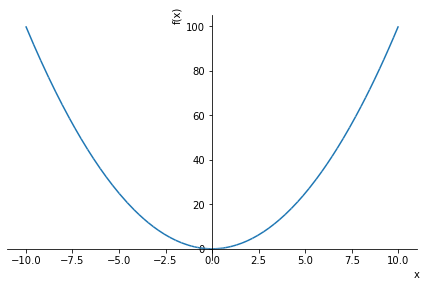

In [25]:
from sympy import symbols
from sympy.plotting import plot

# symboler
x = symbols('x')
f=x*x

# Kurvan
p = plot(f)

Observera ingen linspace eller arange. Värden är förinställda. I grafen finns också f(x) och x vid axlarna. Observera också att plotten är förinställd på det koordinatsystem som vi är vana vid i svensk skola (inte den så kallade box-konstruktionen som är en ram)

Kontroll av axlarna ordnas genom att ange x och vilka gränser x ska ha (lägre och övre).

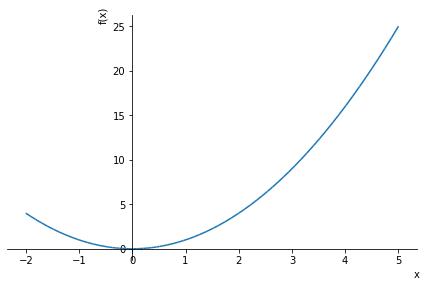

In [26]:
from sympy import symbols
from sympy.plotting import plot

# symboler
x = symbols('x')
f=x*x

# Kurvan med specificerade gränser för x
p = plot(f, (x,-2,5))

Man uppmanas i litteraturen om god sed att alltid ange gränser. 

Lite blandade exempel:

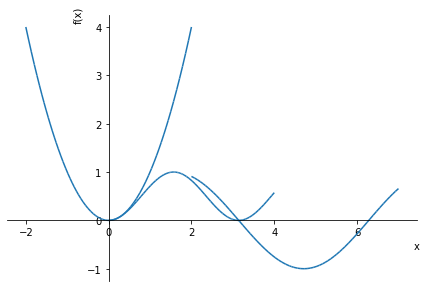

In [28]:
# Plotta flera funktioner

from sympy import symbols
from sympy.plotting import plot

# symboler
x = symbols('x')
f=x*x
g=sin(x)
h=sin(x)**2

# Kurvan med specificerade gränser för x
p = plot((f, (x,-2,2)), (g, (x,2,7)), (h, (x,0,4)))

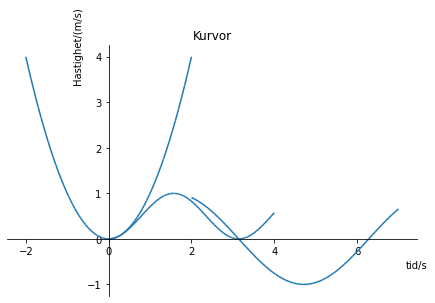

In [32]:
# Utsmyckning

from sympy import symbols
from sympy.plotting import plot

# symboler
x = symbols('x')
f=x*x
g=sin(x)
h=sin(x)**2

# Kurvan med specificerade gränser för x
p = plot((f, (x,-2,2)), (g, (x,2,7)), (h, (x,0,4)),
         title="Kurvor", xlabel="tid/s", 
         ylabel="Hastighet/(m/s)")

Kommandon finns också för parametrisk plottning i 2D: `plot_parametric()`

Vi tittar nu på att plotta ytor i 3D.

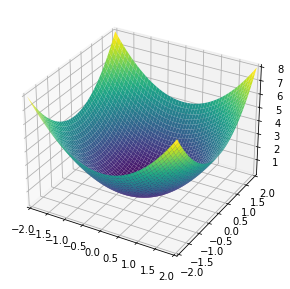

In [34]:
# Plotta ytor i 3D

from sympy import symbols
from sympy.plotting import plot3d

# symboler
x, y = symbols('x y')
f=x*x+y*y

# Ytan
p = plot3d((f, (x,-2,2), (y,-2,2)))

Sedan följer ytterligare argument i samma stil som tidigare.

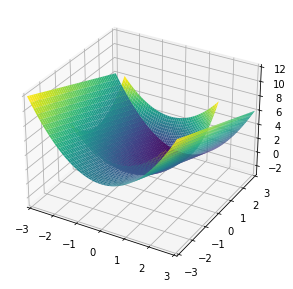

In [35]:
# Plotta ytor i 3D

from sympy import symbols
from sympy.plotting import plot3d

# symboler
x, y = symbols('x y')

#Ytor
f=x*x+y*y
g=x*x-y

# Plot
p = plot3d((f, (x,-2,2), (y,-2,2)), (g, (x,-3,3),(y,-3,3)))

För parameterkurvor finns `plot_parametric_line()`. För parametriska ytor: `plot3d_parametric_surface()`.



Begreppet subplots som vi haft tidigare heter i sympy `PlotGrid()`


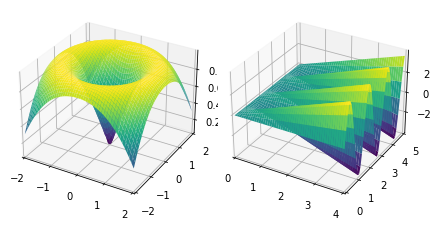

In [42]:
from sympy import symbols
from sympy.plotting import plot3d, PlotGrid

# symboler
x, y = symbols('x y')
f=sin(sqrt(x*x+y*y))
g=x*sin(4*y)

p1 = plot3d((f, (x,-2,2), (y,-2,2)), show=False)
p2 = plot3d((g, (x, 0,4), (y,0,5)), show=False)
PlotGrid(1,2, p1,p2)

Antalet punkter som behövs för att få en jämn graf beräknas genom en adaptiv algoritm. Vill man styra det själv går det naturligtvis bra med ett kwargs.

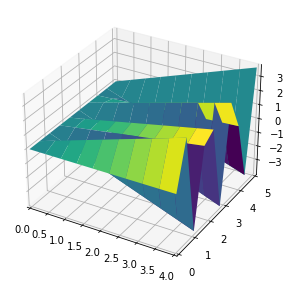

In [53]:
from sympy import symbols
from sympy.plotting import plot3d

# symboler
x, y = symbols('x y')

# funktionen
g=x*sin(4*y)

# Plot
p = plot3d((g, (x, 0,4), (y,0,5)),
           nb_of_points_x=10, nb_of_points_y=10)